# 1 导入库并查看数据

## 1.1 导入库

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1.2 导入并查看数据

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2 数据预处理

## 2.1 删除无关特征

In [4]:
correlation = data[['Time', 'Class']].corr()
print(correlation)

           Time     Class
Time   1.000000 -0.012323
Class -0.012323  1.000000


In [5]:
# 鉴于上述计算，Time很可能是一个无关特征，所以我们舍弃 Time 变量
data = data.drop(columns=['Time'])

## 2.2 检查数据分布

### 2.2.1 直方图

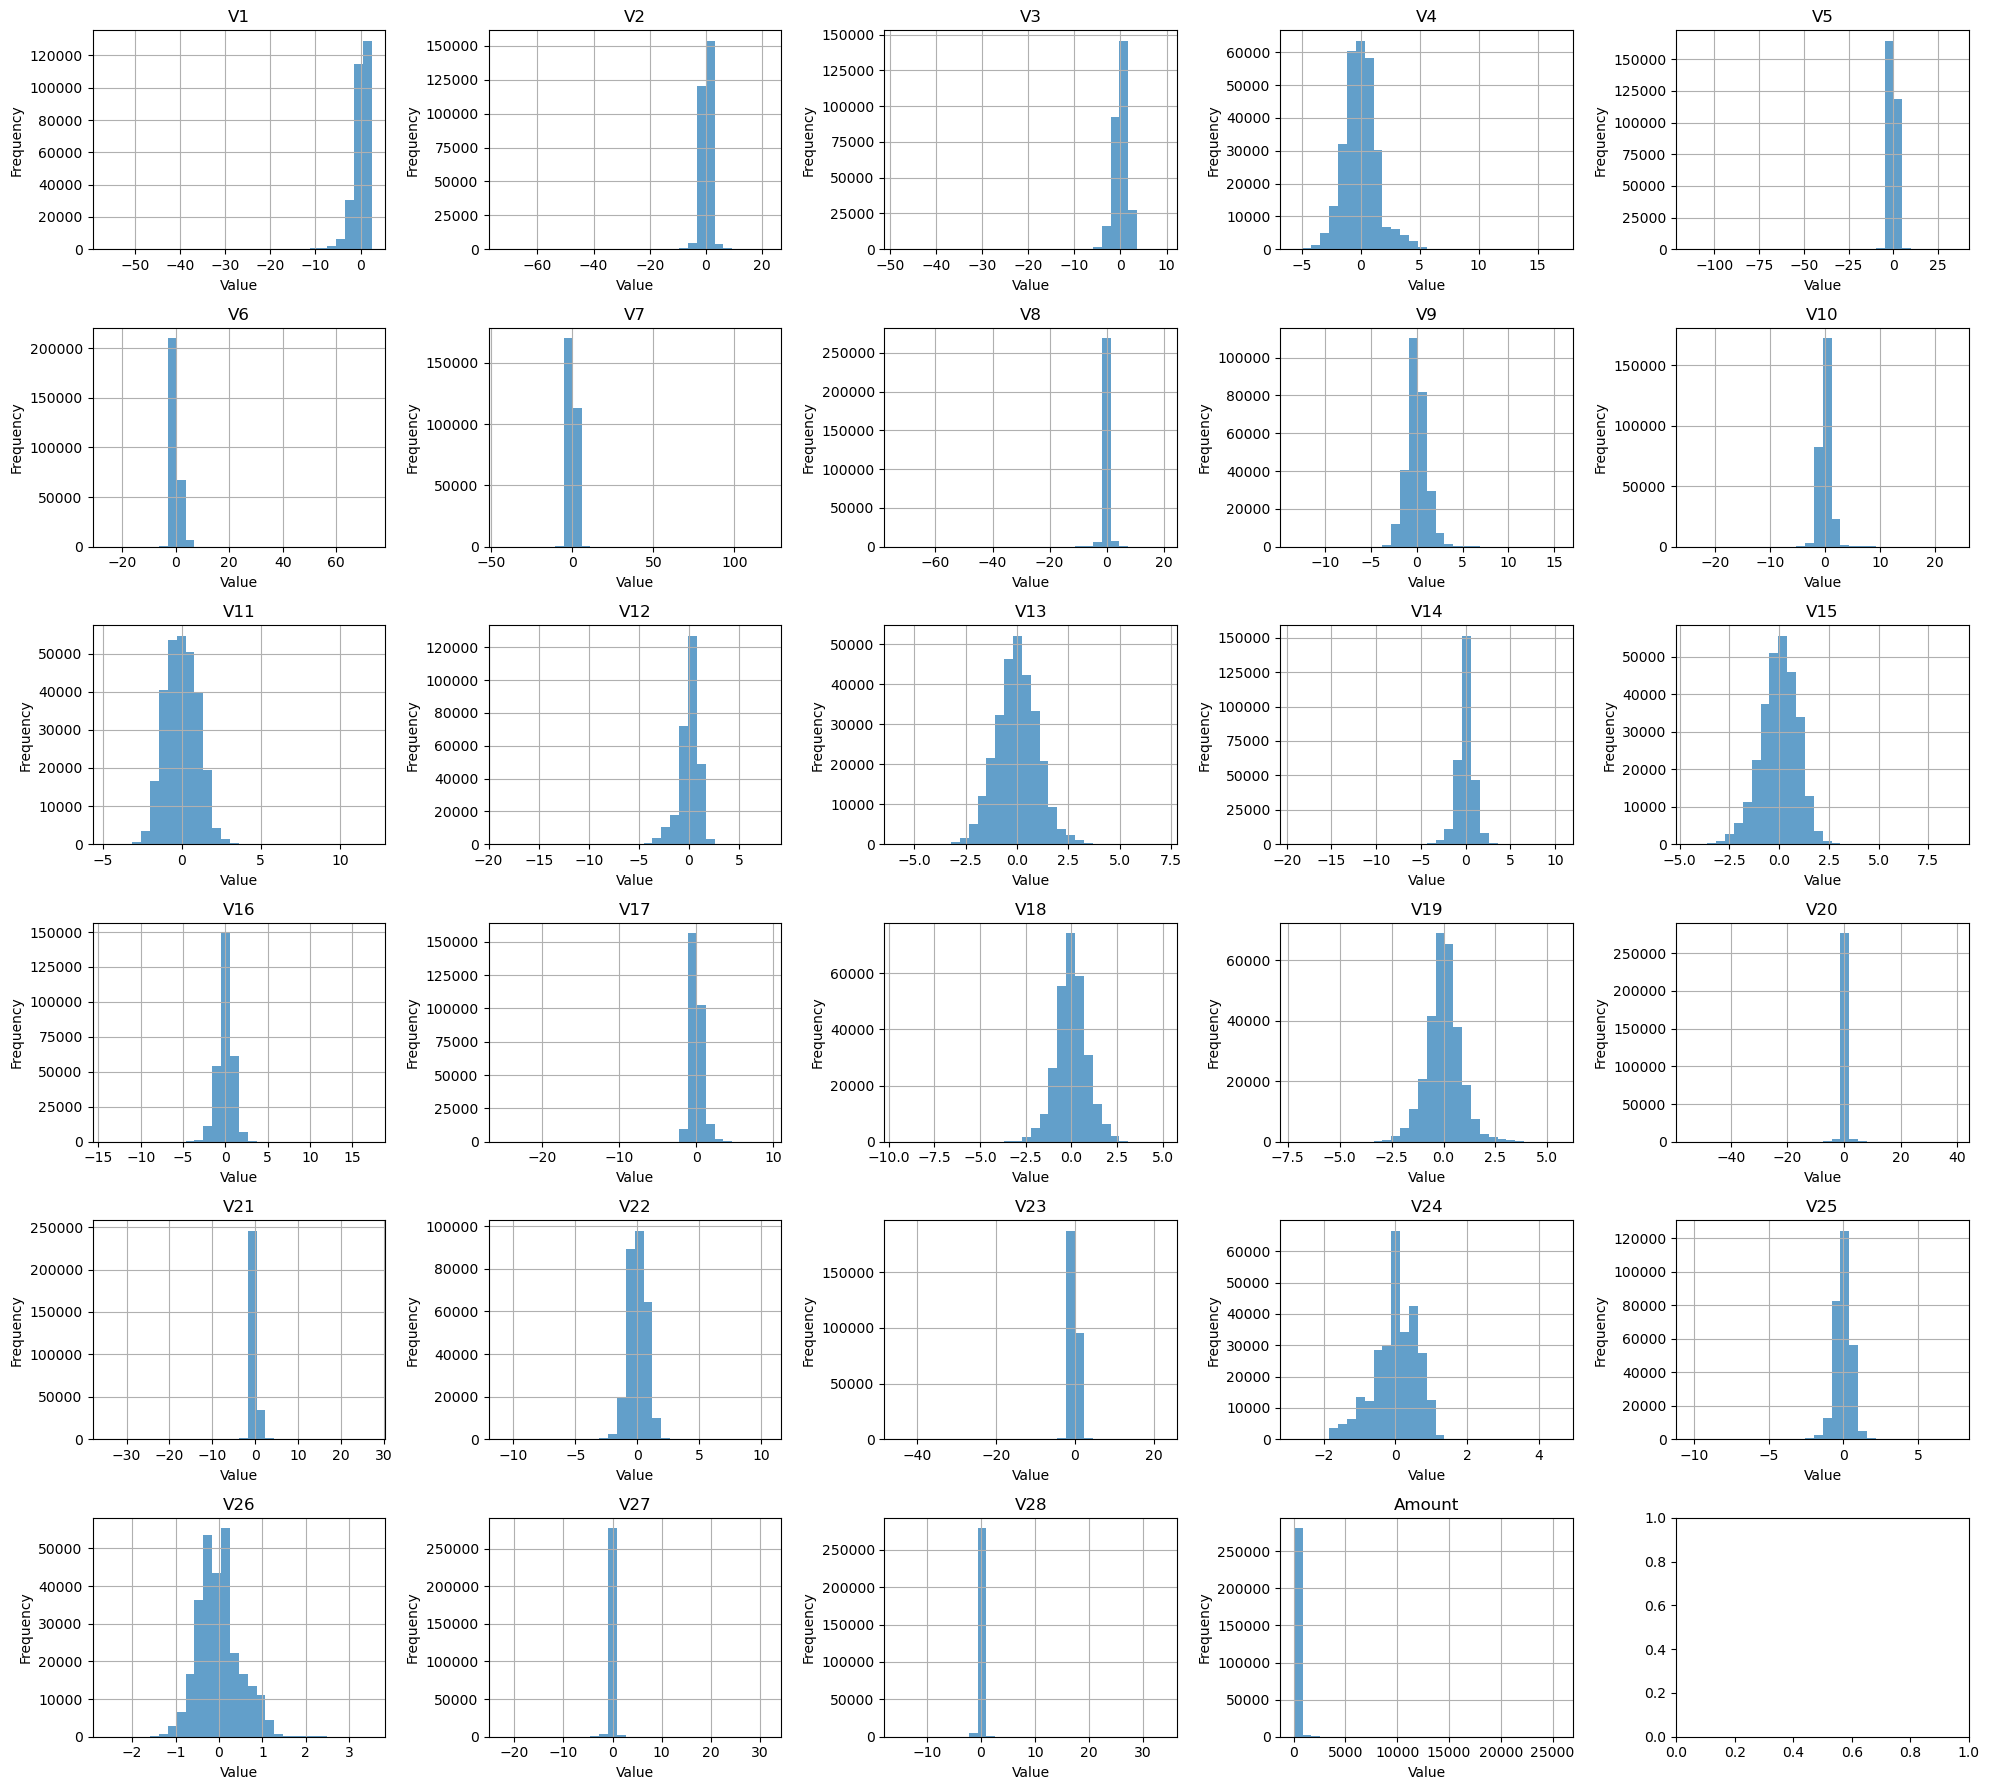

In [6]:
# 设置图形大小
num_features = len(data.columns)  # 特征数量
cols = 5  # 每行显示的图表数量
rows = (num_features + cols - 1) // cols  # 计算行数

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # 设置子图网格
axes = axes.flatten()  # 将子图对象展平，方便迭代

for i, column in enumerate(data.columns):
    if column != 'Class':  # 排除目标变量
        ax = axes[i]
        data[column].hist(bins=30, alpha=0.7, ax=ax)  # 绘制直方图
        ax.set_title(column)  # 设置标题
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

# 如果子图数量多于特征数量，隐藏多余的子图
for i in range(len(data.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # 自动调整子图间距
plt.show()

### 2.2.2 密度图

C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\1453106493.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wil

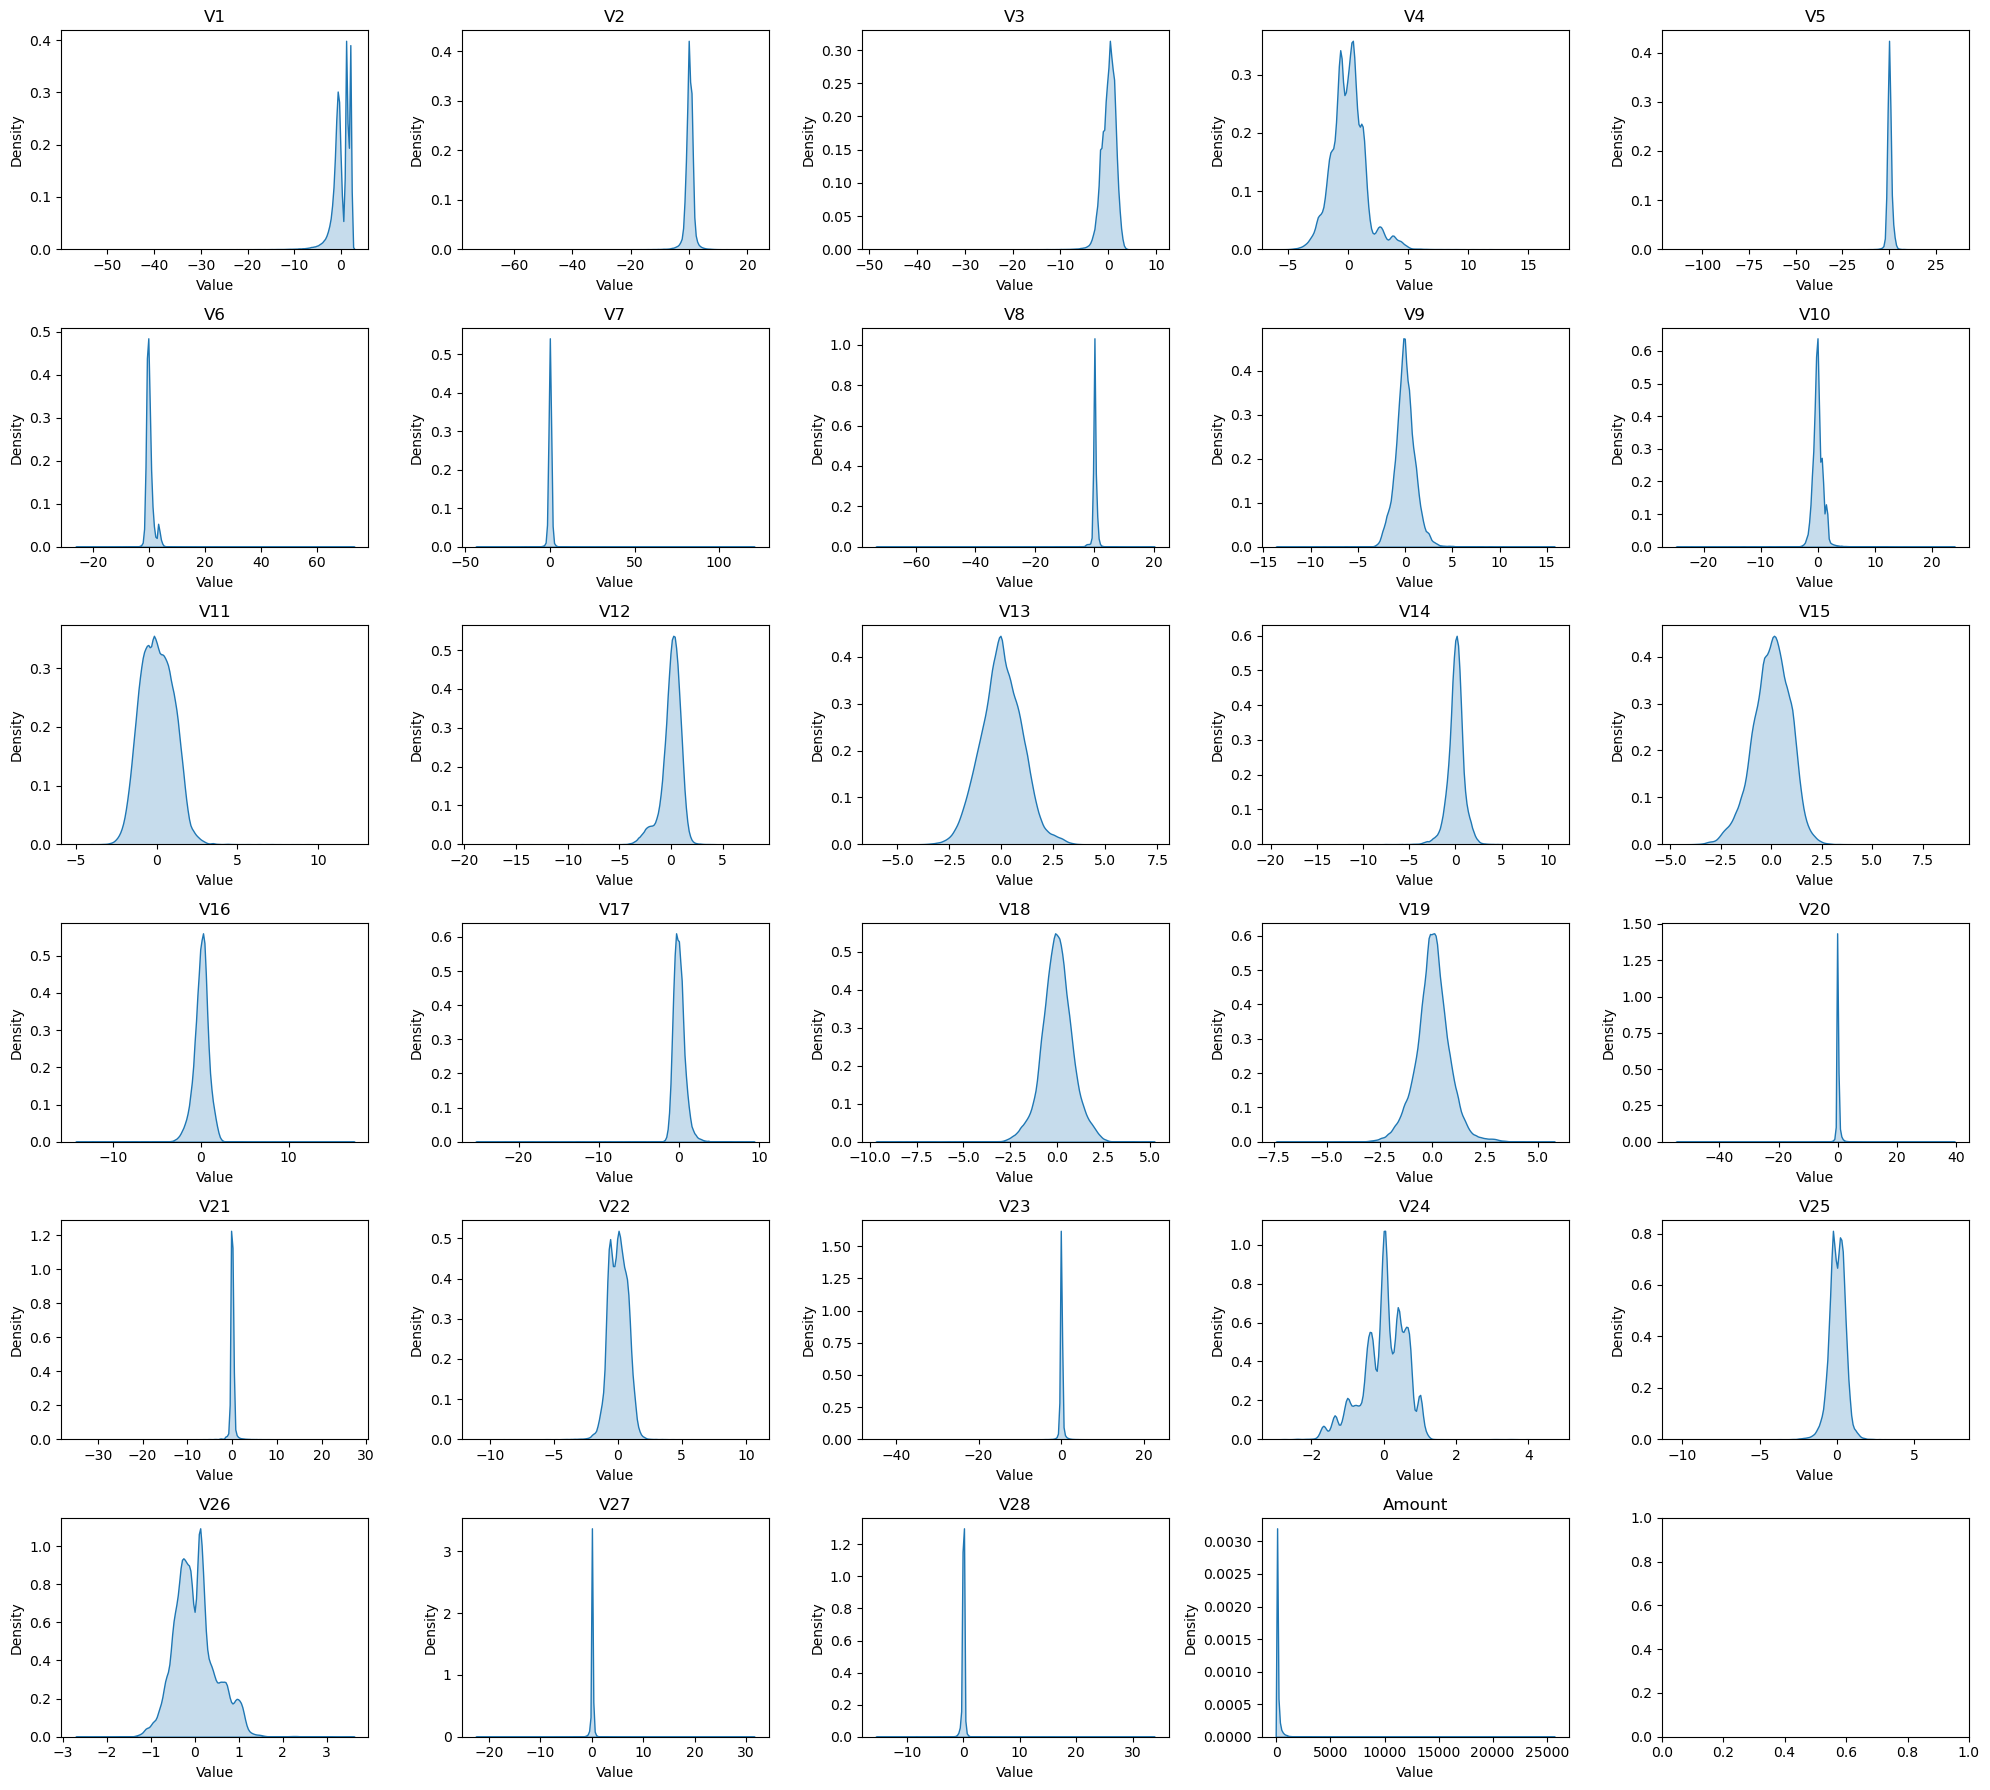

In [7]:
# 设置图形大小
num_features = len(data.columns)  # 特征数量
cols = 5  # 每行显示的图表数量
rows = (num_features + cols - 1) // cols  # 计算行数

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # 设置子图网格
axes = axes.flatten()  # 将子图对象展平以便于迭代

for i, column in enumerate(data.columns):
    if column != 'Class':  # 排除目标变量
        ax = axes[i]
        sns.kdeplot(data[column], ax=ax, shade=True)  # 绘制密度图
        ax.set_title(column)  # 设置标题
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")

# 如果子图数量多于特征数量，隐藏多余的子图
for i in range(len(data.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # 自动调整子图间距
plt.show()

# 3 数据可视化

## 3.1 相关性热图查看特征间关系

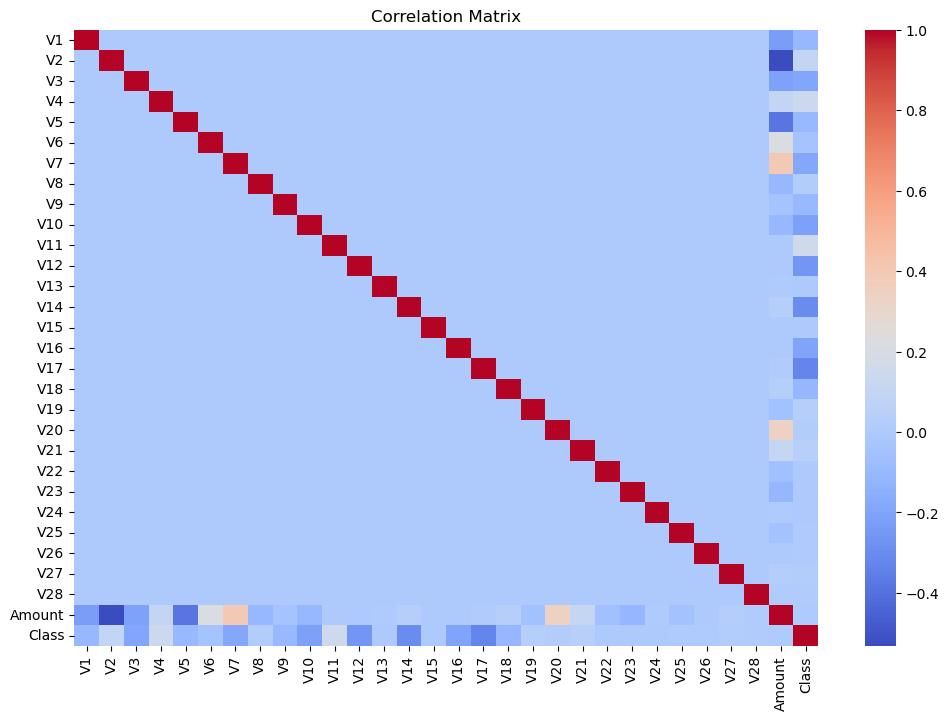

In [8]:
# 计算相关性矩阵
correlation_matrix = data.corr()

# 绘制相关性热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 3.2 欺诈与非欺诈交易的特征差异

In [9]:
# 按目标变量分组
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\3635912487.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[column], label='Fraud', shade=True, color='red', ax=ax)
C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\3635912487.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[column], label='Non-Fraud', shade=True, color='blue', ax=ax)
C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\3635912487.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[column], label='Fraud', shade=True, color='red', ax=ax)
C:\Users\avawa\AppData\Local\Temp\ipykernel_15884\3635912487.py:13: FutureWarning: 

`shade

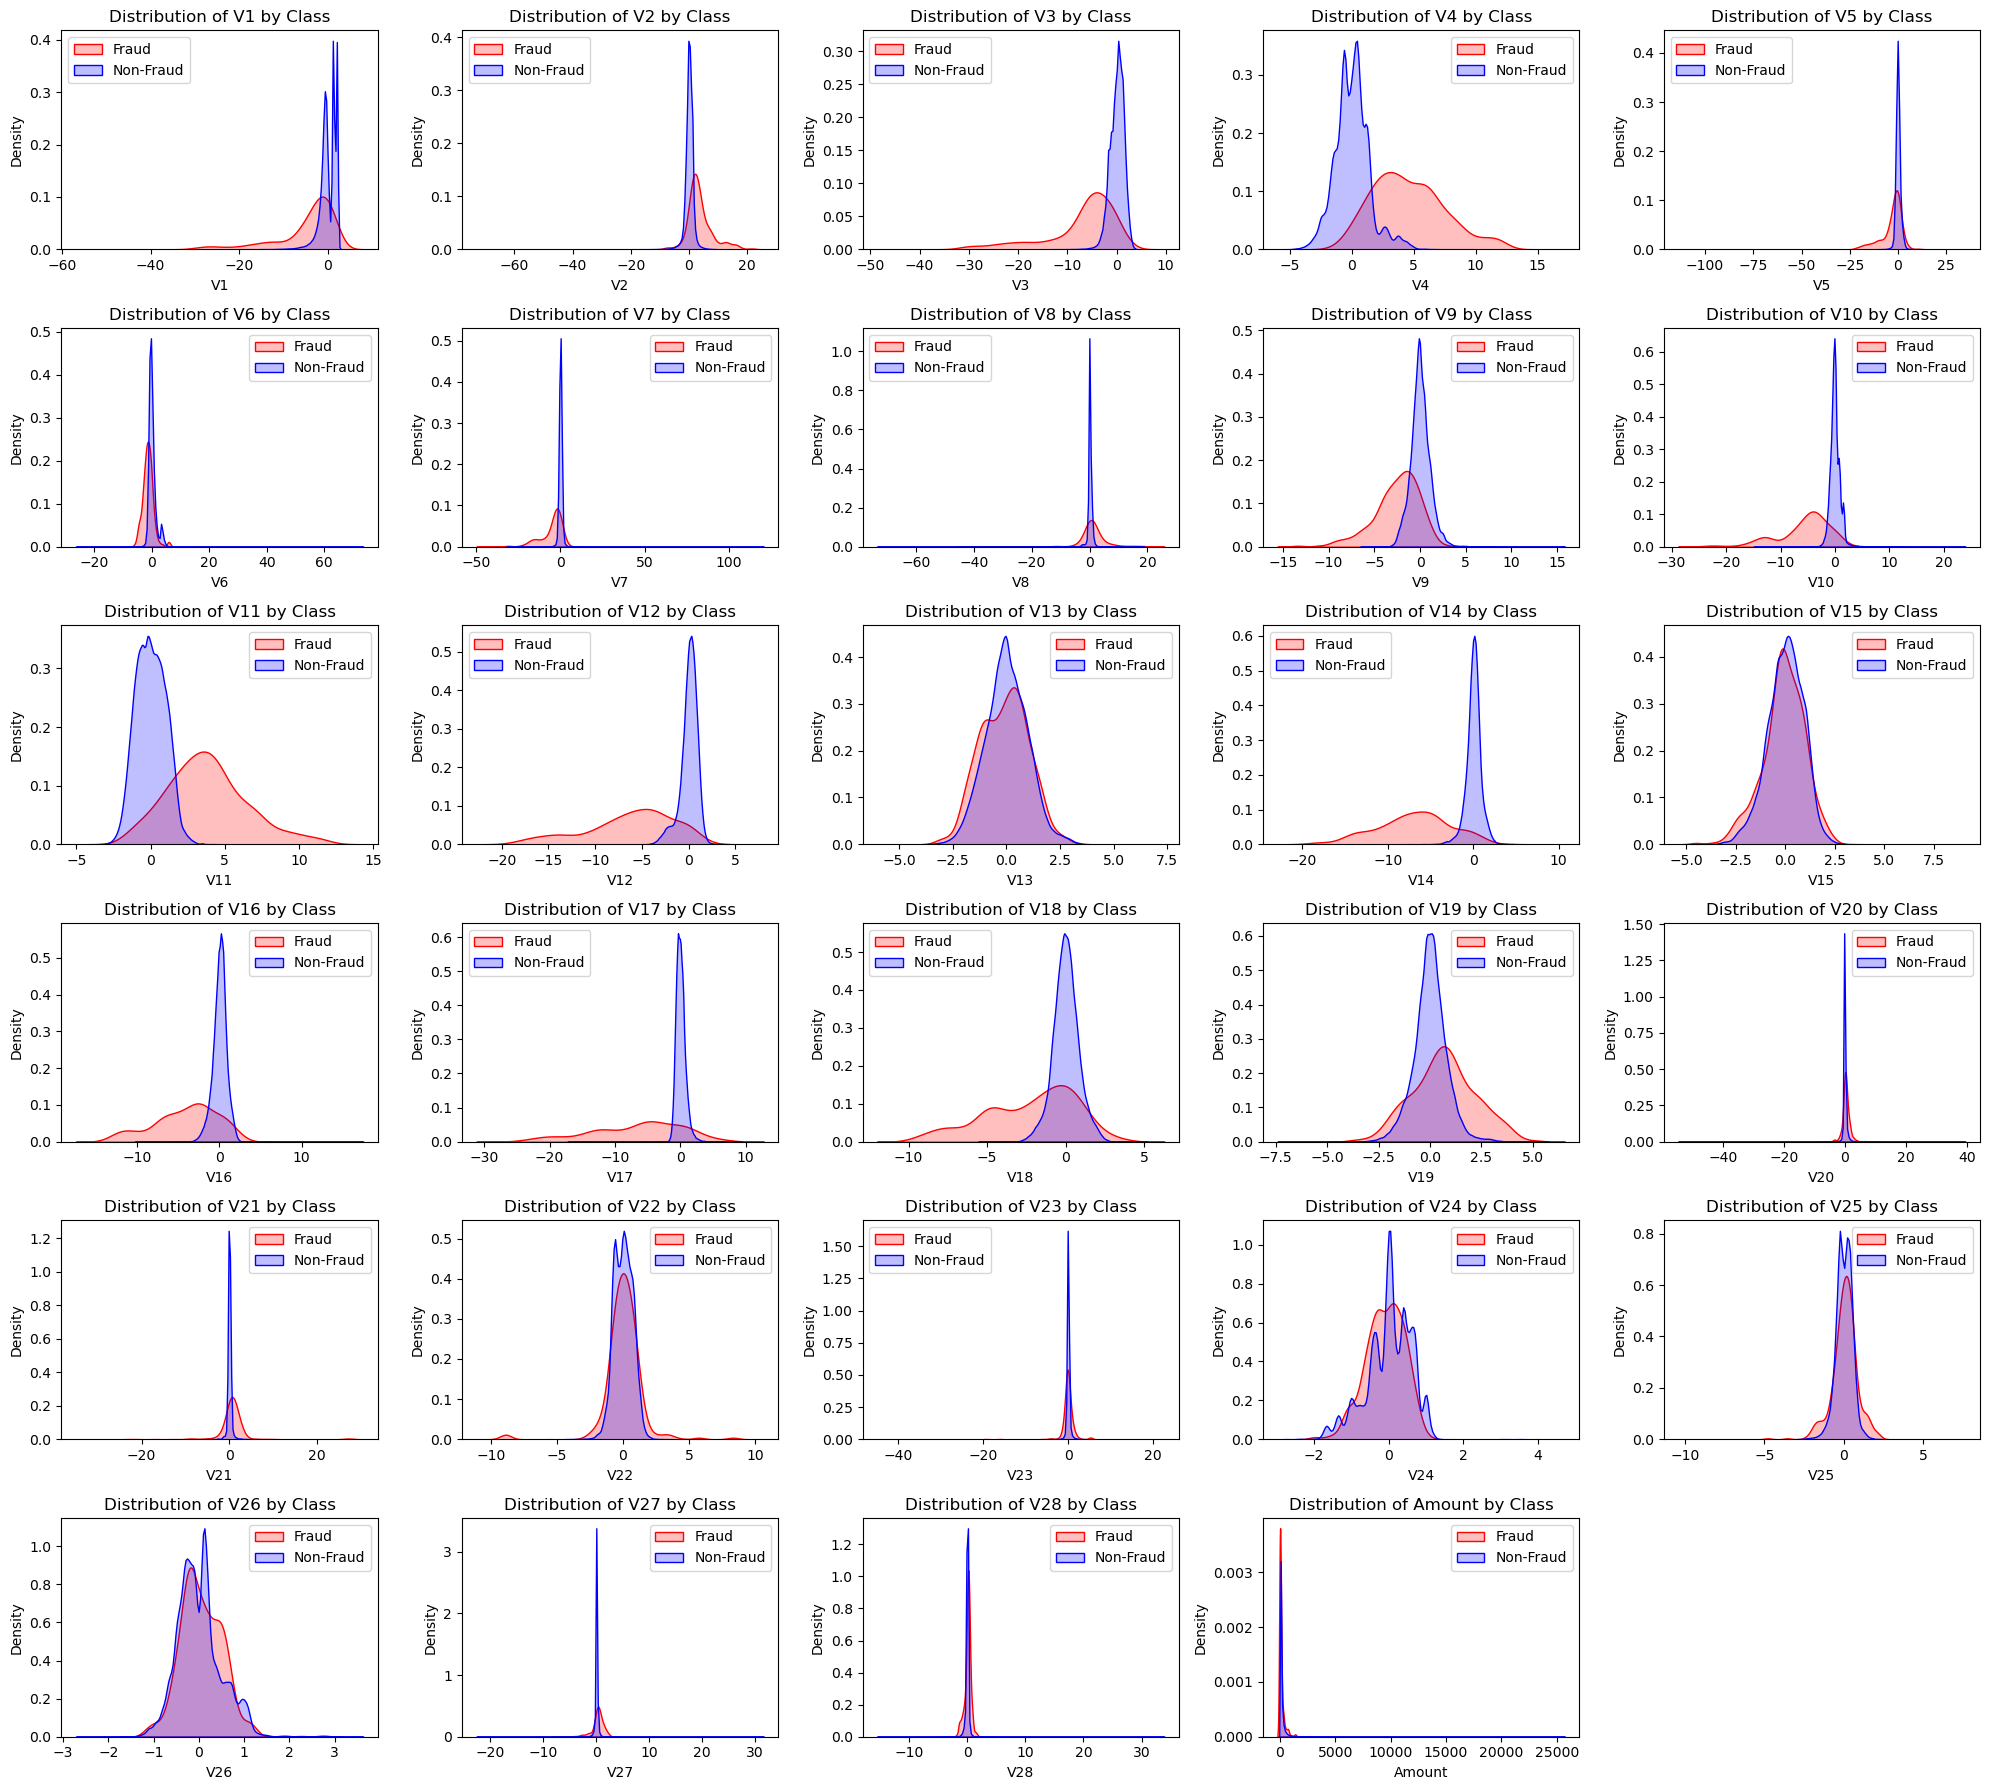

In [10]:
# 设置图形大小
num_features = len(data.columns) - 1  # 排除目标变量
cols = 5  # 每行显示的图表数量
rows = (num_features + cols - 1) // cols  # 计算行数

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # 设置子图网格
axes = axes.flatten()  # 将子图对象展平，方便迭代

for i, column in enumerate(data.columns):
    if column != 'Class':  # 排除目标变量
        ax = axes[i]
        sns.kdeplot(fraud[column], label='Fraud', shade=True, color='red', ax=ax)
        sns.kdeplot(non_fraud[column], label='Non-Fraud', shade=True, color='blue', ax=ax)
        ax.set_title(f'Distribution of {column} by Class')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()

# 如果子图数量多于特征数量，隐藏多余的子图
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # 自动调整子图间距
plt.show()

# 4 特征工程

## 4.1 特征缩放

In [11]:
# 对 Amount 特征进行标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# 如果需要对其他特征进行归一化，可以使用 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data_scaled = scaler_minmax.fit_transform(data)

## 4.2 特征选择

### 4.2.1 相关性计算

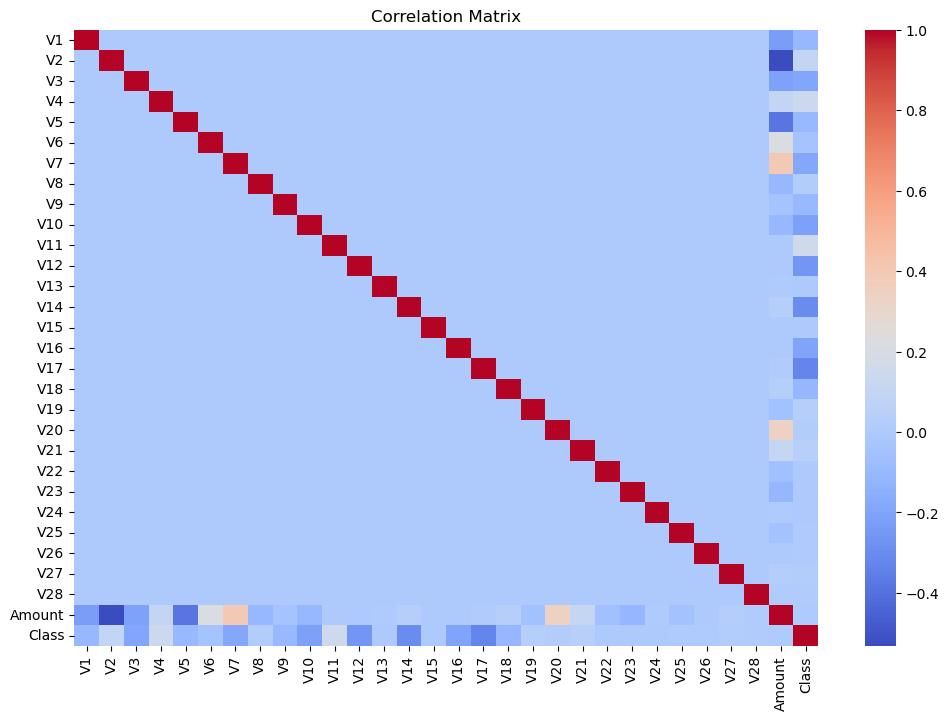

Correlation with target variable (Class):
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [12]:
# 计算相关性矩阵
correlation_matrix = data.corr()

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 查看与目标变量 Class 的相关性
correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)
print("Correlation with target variable (Class):")
print(correlation_with_target)

### 4.2.2 结合相关性, 通过机器学习方法选择特征

In [13]:
# 根据相关性筛选特征
threshold = 0.1
correlations = correlation_matrix['Class']  # 获取与目标变量 Class 的相关性
selected_features = correlations[abs(correlations) > threshold].index.tolist()
selected_features.remove('Class')  # 移除目标变量

In [14]:
from sklearn.ensemble import RandomForestClassifier

# 定义 X 和 y
X = data[selected_features]  # 使用已选择的特征
y = data['Class']  # 目标变量

# 使用随机森林进一步筛选
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
important_features = X.columns[np.argsort(importances)[-10:]].tolist()
print("Important features after two-step selection:", important_features)

Important features after two-step selection: ['V3', 'V7', 'V4', 'V18', 'V11', 'V16', 'V10', 'V14', 'V12', 'V17']


In [15]:
# 验证特征选择效果
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X[important_features], y, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", scores)

Cross-validation AUC scores: [0.9725779  0.93830964 0.91496999 0.94720923 0.90652138]


# 5 模型训练与评估

## 5.1 数据分割

In [16]:
from sklearn.model_selection import train_test_split

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 查看训练集和测试集的类别分布
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Test set class distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


## 5.2 处理不平衡数据

In [17]:
# 查看类别分布
class_counts = data['Class'].value_counts()
print(class_counts)

# 查看比例
class_ratios = data['Class'].value_counts(normalize=True)
print(class_ratios)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [18]:
# 使用XGBoost的加权损失函数，让模型对 Class=1 的样本赋予更高的权重
from xgboost import XGBClassifier

# 设置 scale_pos_weight 参数
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])  # 类别比例
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## 5.3 模型训练

### 5.3.1 设置超参数

In [ ]:
import lightgbm as lgb

# 创建 LightGBM 数据集
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# 设置参数
params = {
    'objective': 'binary',  # 二分类任务
    'metric': 'binary_logloss', # 评价指标
    'boosting_type': 'gbdt',    # 梯度提升决策树
    
    'learning_rate': 0.05, # 学习率
    'num_leaves': 31, # 最大叶子节点数
    'max_depth': 6,    # 树的最大深度，防止过拟合
    
    'feature_fraction': 0.8,  # 每次迭代使用的特征比例，防止过拟合
    'bagging_fraction': 0.8,  # 每次迭代使用的数据比例，防止过拟合
    'bagging_freq': 5,  # 每 5 次迭代进行一次 bagging
    
    'lambda_l1': 0.1,  # L1 正则化
    'lambda_l2': 0.2,  # L2 正则化
    
    'min_data_in_leaf': 20,  # 每个叶子节点的最小样本数，防止过拟合
    'min_child_weight': 0.02, # 使一个结点分裂的最小海森值之和
    'max_bin': 255,  # 特征分箱的最大数量，较大的值可以提高精度但会增加计算量
    'verbosity': -1  # 关闭训练过程中的日志输出
}

### 5.3.2 定义AUPRC评估函数

In [20]:
from sklearn.metrics import average_precision_score

# 自定义 AUPRC 评估函数
def auprc_eval(preds, train_data):
    labels = train_data.get_label()  # 获取真实标签
    score = average_precision_score(labels, preds)  # 计算 AUPRC
    return 'auprc', score, True  # 返回指标名称、值和是否越高越好

### 5.3.3 训练模型

In [21]:
# 训练模型
from lightgbm import early_stopping
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=50)],
    feval=auprc_eval  # 使用自定义 AUPRC 评估函数
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[4]	train's binary_logloss: 0.00420803	train's auprc: 0.82827	valid's binary_logloss: 0.00438814	valid's auprc: 0.769847


### 5.3.4 对测试集进行预测

In [22]:
# 使用模型对测试集进行预测
y_pred = model.predict(X_test)

## 5.4 模型评估

### 5.4.1 对预测结果进行评估

In [23]:
from sklearn.metrics import precision_recall_curve, auc

# 计算 Precision-Recall 曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# 计算 AUPRC
auprc = auc(recall, precision)
print("Test AUPRC:", auprc)

Test AUPRC: 0.7757019225723487


### 5.4.2 检查 Precision-Recall曲线

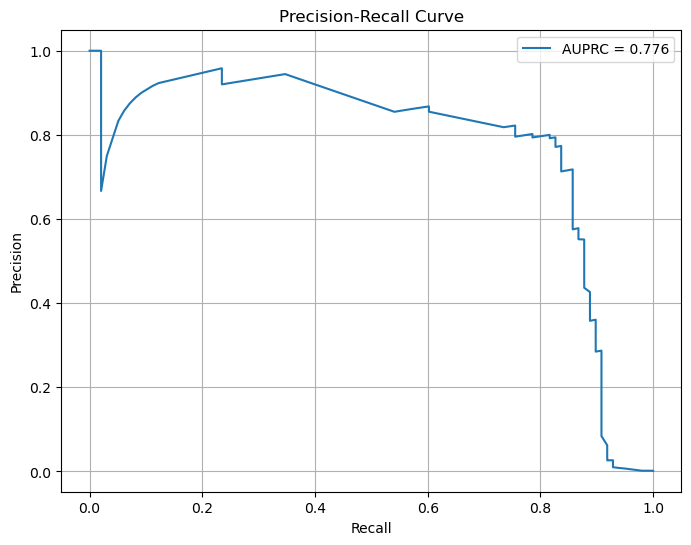

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUPRC = {auprc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

## 5.5 超参数调优

### 5.5.1 max_depth 和 num_leaves

In [31]:
from sklearn.model_selection import GridSearchCV
# 创建 LightGBM 的 sklearn 接口模型
model_lgb = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42)

# 定义参数网格
param_grid1 = {
    'max_depth': [4, 6, 8, 10],  # max_depth 的候选值
    'num_leaves': [15, 31, 63, 127]  # num_leaves 的候选值
}

# 使用 GridSearchCV 进行网格搜索
grid_search1 = GridSearchCV(
    estimator=model_lgb,
    param_grid=param_grid1,
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    cv=5,  # 5 折交叉验证
    verbose=1,  # 输出搜索过程
    n_jobs=-1  # 使用所有可用的 CPU 核心
)

# 执行网格搜索
grid_search1.fit(X_train, y_train)

# 输出最佳参数和对应的分数
print("Best parameters found:", grid_search1.best_params_)
print("Best cross-validation AUC score:", grid_search1.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'max_depth': 10, 'num_leaves': 127}
Best cross-validation AUC score: 0.811198536746087


In [39]:
# 输出所有参数组合及其对应的 AUC 分数
results = grid_search1.cv_results_
mean_scores = results['mean_test_score']  # 平均测试分数
params = results['params']  # 参数组合

print("\nAll parameter combinations and their AUC scores:")
for param, score in zip(params, mean_scores):
    print(f"Parameters: {param}, AUC Score: {score}")


All parameter combinations and their AUC scores:
Parameters: {'max_depth': 9, 'num_leaves': 121}, AUC Score: 0.7741047162847835
Parameters: {'max_depth': 9, 'num_leaves': 123}, AUC Score: 0.6911307205869254
Parameters: {'max_depth': 9, 'num_leaves': 127}, AUC Score: 0.6803755131402733
Parameters: {'max_depth': 9, 'num_leaves': 131}, AUC Score: 0.7777321681408443
Parameters: {'max_depth': 9, 'num_leaves': 135}, AUC Score: 0.7265378012882131
Parameters: {'max_depth': 10, 'num_leaves': 121}, AUC Score: 0.7527603031545331
Parameters: {'max_depth': 10, 'num_leaves': 123}, AUC Score: 0.681176791951964
Parameters: {'max_depth': 10, 'num_leaves': 127}, AUC Score: 0.811198536746087
Parameters: {'max_depth': 10, 'num_leaves': 131}, AUC Score: 0.516502618733961
Parameters: {'max_depth': 10, 'num_leaves': 135}, AUC Score: 0.6832723388848717
Parameters: {'max_depth': 11, 'num_leaves': 121}, AUC Score: 0.6226689119681184
Parameters: {'max_depth': 11, 'num_leaves': 123}, AUC Score: 0.669763295576423

In [35]:
# 定义参数网格
param_grid2 = {
    'max_depth': [9, 10, 11],  # max_depth 的候选值
    'num_leaves': [121, 123, 127, 131, 135]  # num_leaves 的候选值
}

# 使用 GridSearchCV 进行网格搜索
grid_search2 = GridSearchCV(
    estimator=model_lgb,
    param_grid=param_grid2,
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    cv=5,  # 5 折交叉验证
    verbose=1,  # 输出搜索过程
    n_jobs=-1  # 使用所有可用的 CPU 核心
)

# 执行网格搜索
grid_search2.fit(X_train, y_train)

# 输出最佳参数和对应的分数
print("Best parameters found:", grid_search2.best_params_)
print("Best cross-validation AUC score:", grid_search2.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found: {'max_depth': 10, 'num_leaves': 127}
Best cross-validation AUC score: 0.811198536746087


### 5.5.2 min_data_in_leaf 和 min_sum_hessian_in_leaf

In [37]:
# 定义参数网格
param_grid3 = {
    'min_child_samples': [18, 19, 20, 21, 22],  # min_child_samples 的候选值
    'min_child_weight':[0.001, 0.002]  # min_child_weight 的候选值
}

# 使用 GridSearchCV 进行网格搜索
grid_search3 = GridSearchCV(
    estimator=model_lgb,
    param_grid=param_grid3,
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    cv=5,  # 5 折交叉验证
    verbose=1,  # 输出搜索过程
    n_jobs=-1  # 使用所有可用的 CPU 核心
)

# 执行网格搜索
grid_search3.fit(X_train, y_train)

# 输出最佳参数和对应的分数
print("Best parameters found:", grid_search3.best_params_)
print("Best cross-validation AUC score:", grid_search3.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'min_child_samples': 22, 'min_child_weight': 0.002}
Best cross-validation AUC score: 0.853026617147958


### 5.5.3 feature_fraction 和 bagging_fraction

In [40]:
# 定义参数网格
param_grid4 = {
    'feature_fraction': [0.75, 0.8, 0.85],
    'bagging_fraction': [0.55, 0.6, 0.65]
}

# 使用 GridSearchCV 进行网格搜索
grid_search4 = GridSearchCV(
    estimator=model_lgb,
    param_grid=param_grid4,
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    cv=5,  # 5 折交叉验证
    verbose=1,  # 输出搜索过程
    n_jobs=-1  # 使用所有可用的 CPU 核心
)

# 执行网格搜索
grid_search4.fit(X_train, y_train)

# 输出最佳参数和对应的分数
print("Best parameters found:", grid_search4.best_params_)
print("Best cross-validation AUC score:", grid_search4.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found: {'bagging_fraction': 0.6, 'feature_fraction': 0.8}
Best cross-validation AUC score: 0.8228804624555194


### 5.5.4 正则化参数

In [41]:
# 定义参数网格
param_grid5 = {
    'lambda_l1': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'lambda_l2': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}

# 使用 GridSearchCV 进行网格搜索
grid_search5 = GridSearchCV(
    estimator=model_lgb,
    param_grid=param_grid5,
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    cv=5,  # 5 折交叉验证
    verbose=1,  # 输出搜索过程
    n_jobs=-1  # 使用所有可用的 CPU 核心
)

# 执行网格搜索
grid_search5.fit(X_train, y_train)

# 输出最佳参数和对应的分数
print("Best parameters found:", grid_search5.best_params_)
print("Best cross-validation AUC score:", grid_search5.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best parameters found: {'lambda_l1': 0.001, 'lambda_l2': 0.5}
Best cross-validation AUC score: 0.977102472370267


In [42]:
# 定义更精细的参数网格
param_grid_6 = {
    'lambda_l1': [0.0005, 0.001, 0.002, 0.005],
    'lambda_l2': [0.4, 0.45, 0.5, 0.55, 0.6]
}

# 使用 GridSearchCV 进行更精细的网格搜索
grid_search_6 = GridSearchCV(
    estimator=model_lgb,
    param_grid=param_grid_6,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 执行网格搜索
grid_search_6.fit(X_train, y_train)

# 输出最佳参数和对应的分数
print("Refined best parameters found:", grid_search_6.best_params_)
print("Refined best cross-validation AUC score:", grid_search_6.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Refined best parameters found: {'lambda_l1': 0.0005, 'lambda_l2': 0.6}
Refined best cross-validation AUC score: 0.9776162228020603


## 5.6 尝试降低 learning_rate

In [43]:
# 设置参数
params_refined = {
    'objective': 'binary',  # 二分类任务
    'metric': 'binary_logloss', # 评价指标
    'boosting_type': 'gbdt',    # 梯度提升决策树
    
    'learning_rate': 0.005, # 学习率
    'num_leaves': 127, # 最大叶子节点数
    'max_depth': 10,    # 树的最大深度，防止过拟合
    
    'feature_fraction': 0.8,  # 每次迭代使用的特征比例，防止过拟合
    'bagging_fraction': 0.6,  # 每次迭代使用的数据比例，防止过拟合
    'bagging_freq': 5,  # 每 5 次迭代进行一次 bagging
    
    'lambda_l1': 0.001,  # L1 正则化
    'lambda_l2': 0.5,  # L2 正则化
    
    'min_data_in_leaf': 22,  # 每个叶子节点的最小样本数，防止过拟合
    'min_child_weight': 0.002, # 使一个结点分裂的最小海森值之和
    'max_bin': 255,  # 特征分箱的最大数量，较大的值可以提高精度但会增加计算量
    'verbosity': -1  # 关闭训练过程中的日志输出
}

In [44]:
model_refined = lgb.train(
    params_refined,
    train_data,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=50)],
    feval=auprc_eval  # 使用自定义 AUPRC 评估函数
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[166]	train's binary_logloss: 0.00335638	train's auprc: 0.880061	valid's binary_logloss: 0.00377166	valid's auprc: 0.820829


In [45]:
# 使用模型对测试集进行预测
y_pred_refined = model_refined.predict(X_test)

In [46]:
# 计算 Precision-Recall 曲线
precision_1, recall_1, _ = precision_recall_curve(y_test, y_pred_refined)

# 计算 AUPRC
auprc = auc(recall_1, precision_1)
print("Test AUPRC:", auprc)

Test AUPRC: 0.8288381723870131


## 5.7 保存和部署

In [47]:
import joblib

# 保存模型到文件
joblib.dump(model_refined, "lgb_optimized_model.pkl")
print("模型已保存为 lgb_optimized_model.pkl")

模型已保存为 lgb_optimized_model.pkl
